## Customer Churn Prediction 
### _An Analysis of Key Churn Indicators and Retention Strategies_

The aim of this project is to identify the key indicators of customer churn and develop retention strategies to reduce customer attrition. The project uses a dataset containing information on customers' demographics, services used, and payment history to analyze the factors that contribute to customer churn. The project involves data cleaning and exploratory data analysis to identify patterns and trends within the data, followed by the development ML classification algorithms to predict customer churn. The findings of the analysis will be used to develop retention strategies aimed at reducing customer churn and improving customer satisfaction and thus customer retention.

### Hypothesis
**Null hypothesis**: 
    there is a significant relationship between _customer churn_ and at least two of the **independent variables**
    _(gender, senior citizen status, artner, dependents, tenure, phone service, multiple lines, internet service, online security,online backup, device protection, tech support, streaming TV, streaming movies, contract, paperless billing, payment method, monthly charges, total charges)_.

**Alternative hypothesis**: 
  There is no significant relationship between any of independent variable and customer churn.

### Questions
1. Is there a correlation between contract length and customer churn?

2. Do customers who have online security and backup services have lower churn rates?

3. Does the payment method have an impact on customer churn?

4. Is there a difference in churn rates between male and female customers?

5. Are customers with dependents less likely to churn compared to those without dependents?

6. Is there a correlation between the Total Charge and customer churn?

7. Are the customers who get TechSupport service less likey to church?

8. Is there a relationship between the customers who get Device protections and churn?


In [1]:
#Import the required libraries for data handling and manipulation 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for ML 
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score


### Data Loading 

In [2]:
#Use the pd.read_csv to load the data
telco=pd.read_csv(r"C:\Users\lakit\OneDrive\Documents\LP3\Telco-Customer-Churn.csv")

### E.D.A

In [3]:
#Preview the first five rows of the dataset
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check if the data has missingte values
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### From the above, the data has no missing values 
#### The data is thus complete and can be used for analysis

## Univariate Analysis

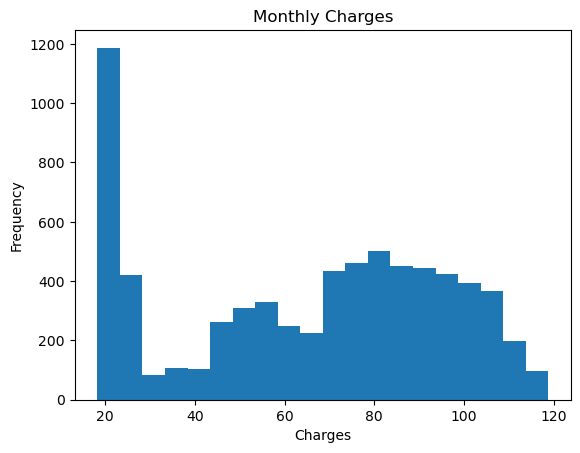

In [6]:
# Create a histogram of MonthlyCharges to analyze the distribution of customers 
plt.hist(telco['MonthlyCharges'], bins=20)
plt.title('Monthly Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

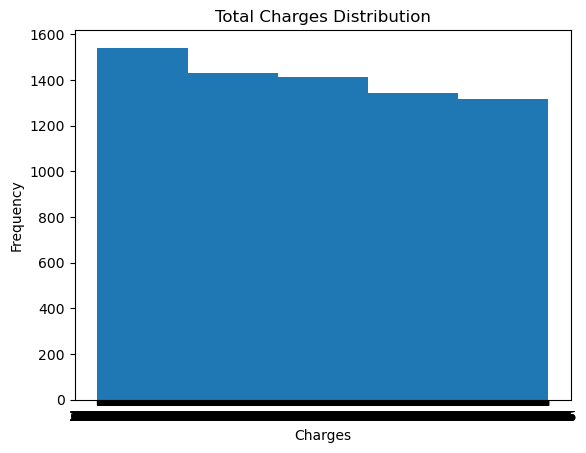

In [7]:
# Create a histogram of MonthlyCharges to analyze the distribution of customers 

plt.hist(telco['TotalCharges'], bins=5)
plt.title('Total Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

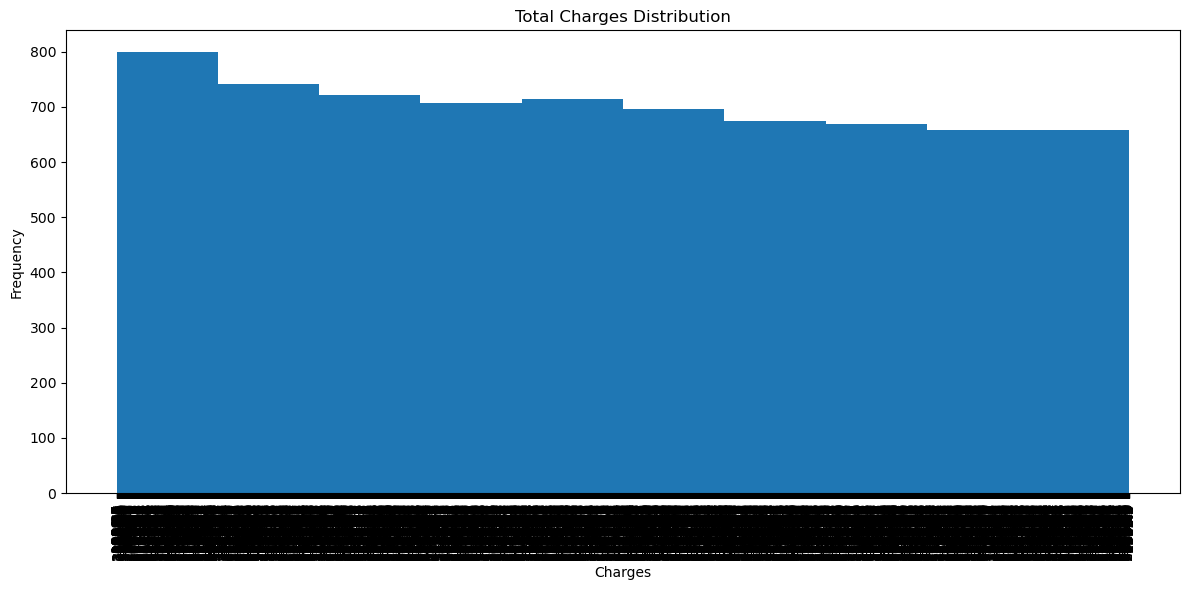

In [8]:
plt.figure(figsize=(12, 6)) # Customize x-axis labels for better readability

plt.hist(telco['TotalCharges'], bins=10)
plt.title('Total Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


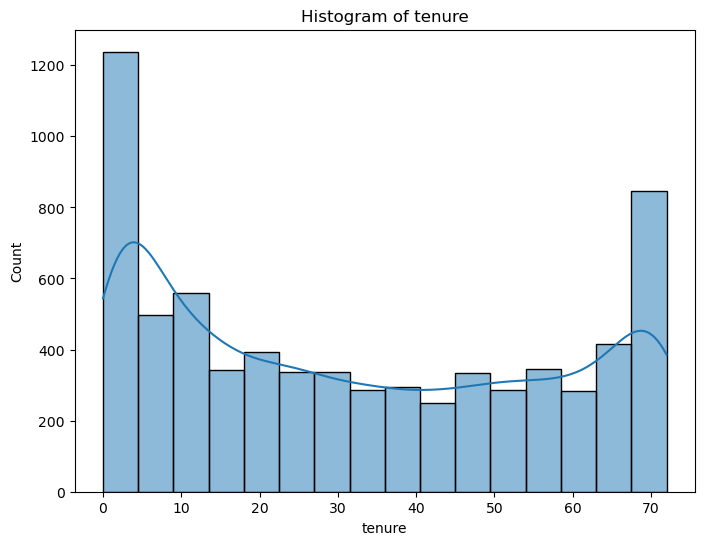

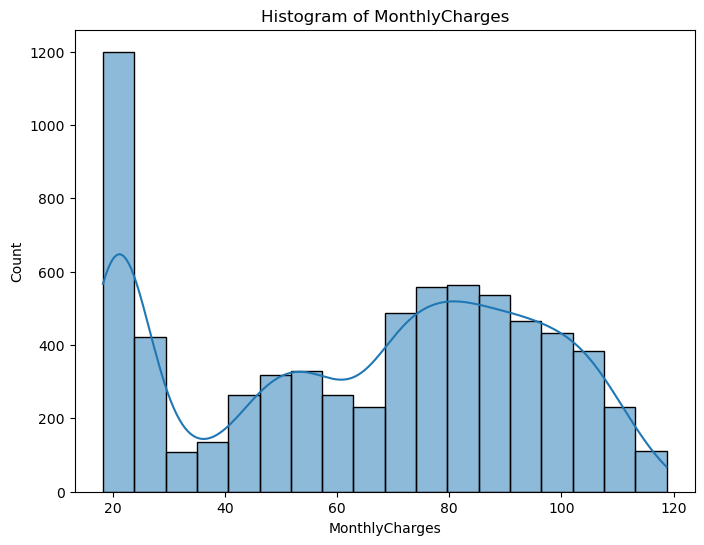

In [9]:
#Declare a library to hold the Numerical features
numerical_cols = ['tenure', 'MonthlyCharges']

# Plot histograms for Numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=telco, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

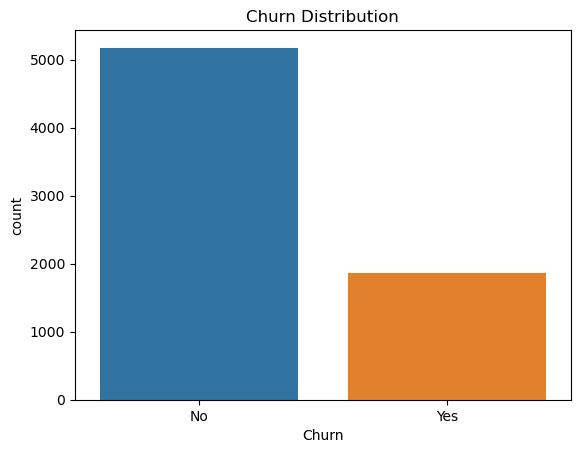

In [10]:
# Check the distribution of the target variable (Churn)
sns.countplot(x='Churn', data=telco)
plt.title('Churn Distribution')
plt.show()

## Univariate Analysis

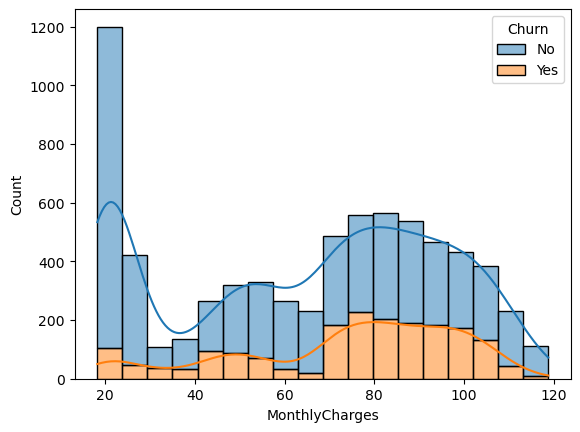

In [11]:
# Histogram of monthly charges and churn
sns.histplot(data=telco, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()

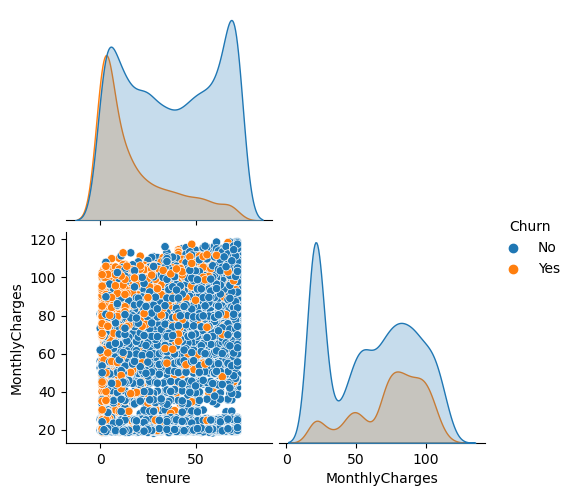

In [12]:
# Check the correlation between numerical features and target variable
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
telco_num = telco[numerical_cols + ['Churn']]
sns.pairplot(telco_num, hue='Churn', corner=True)
plt.show()

In [13]:
# fig, ax=plt.subplots(1,3)
# for i, subplot in numerical_cols:
#     plt.figure(figsize=(15, 8))
#     sns.boxplot(x=telco['Churn'], ax=ax[i])
#     ax[i].set_title({i})
#     ax[i].set_xlabel({i})
# plt.tight_layout()
# plt.show
    

In [14]:
# # Create a box plot for each numerical column
# plt.figure(figsize=(10, 8))

# telco[numerical_cols].boxplot()
# plt.title('Box Plot of Numerical Columns')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.show()


#### From the aboves graph we can see that more people with low tenure and high Montly charge are likely to Churn.

C:\Users\lakit\AppData\Local\Temp\ipykernel_20820\2757572708.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  telco_corr = telco.corr()


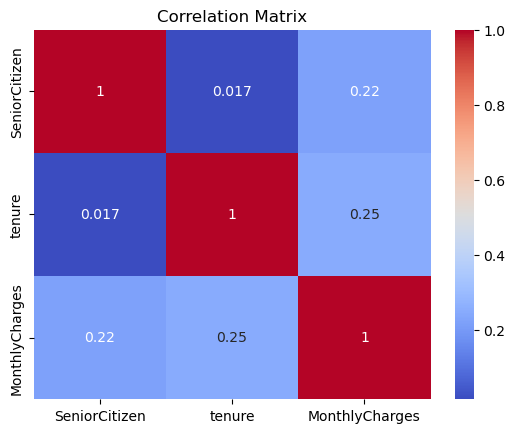

In [15]:
# Check the correlation matrix of all features
telco_corr = telco.corr()
sns.heatmap(telco_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

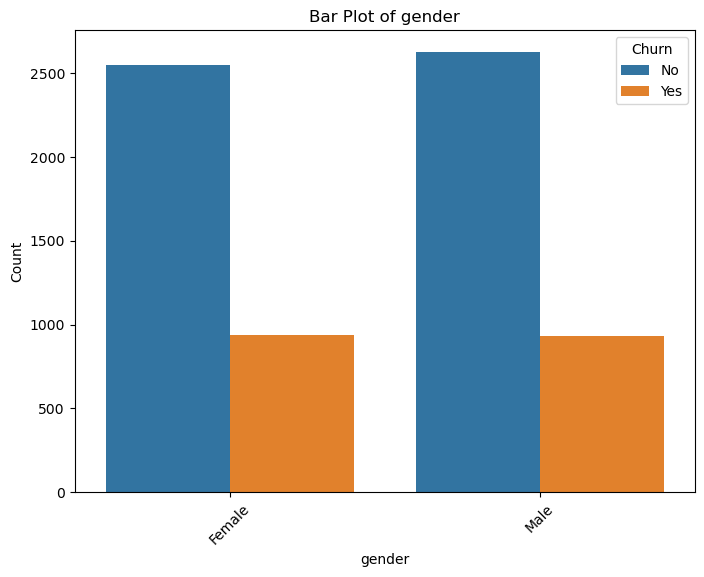

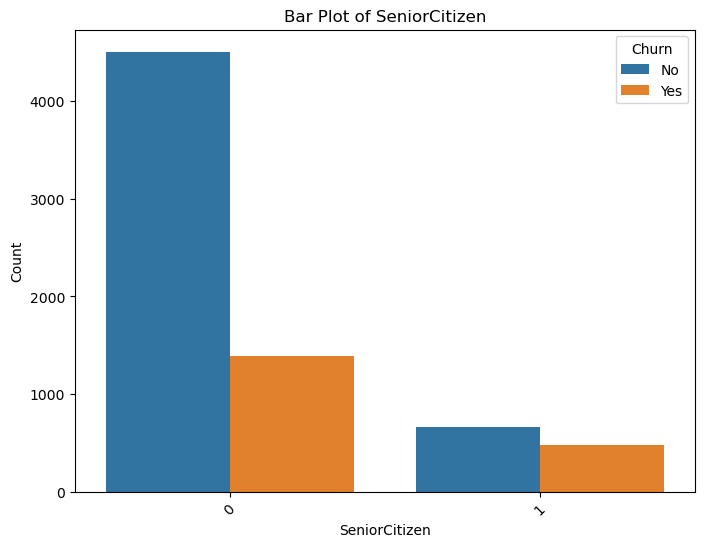

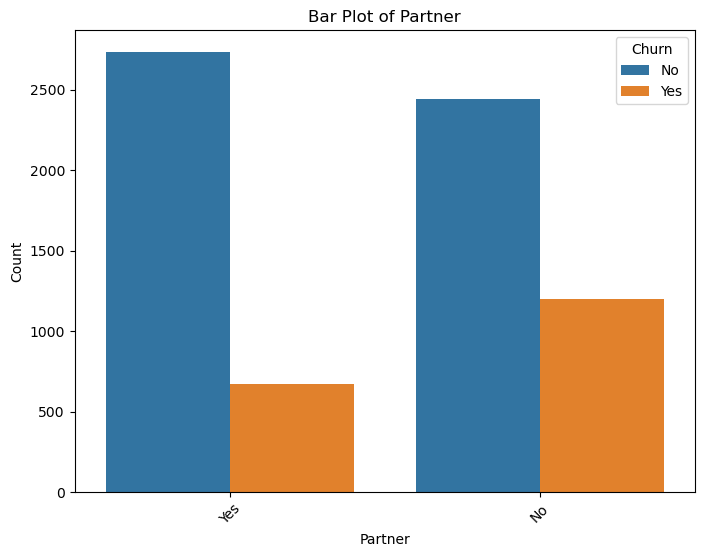

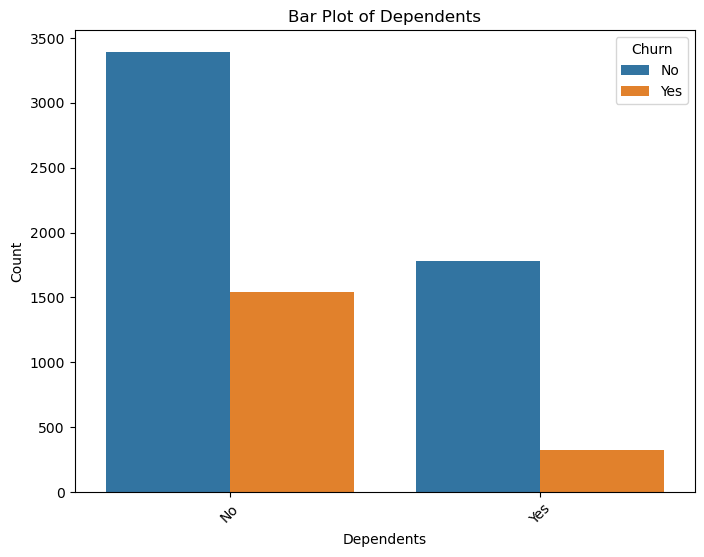

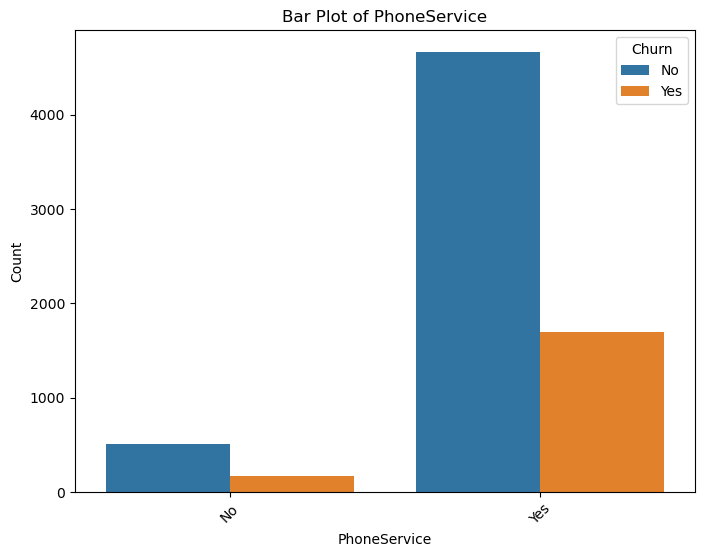

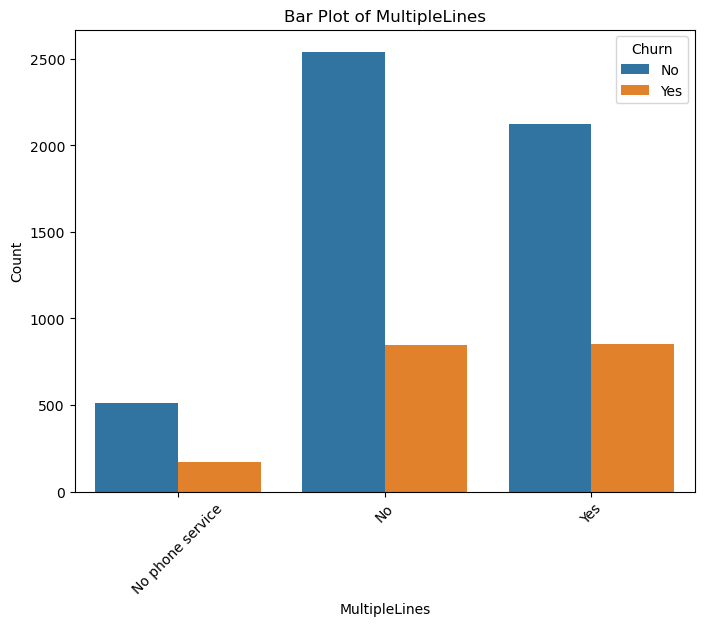

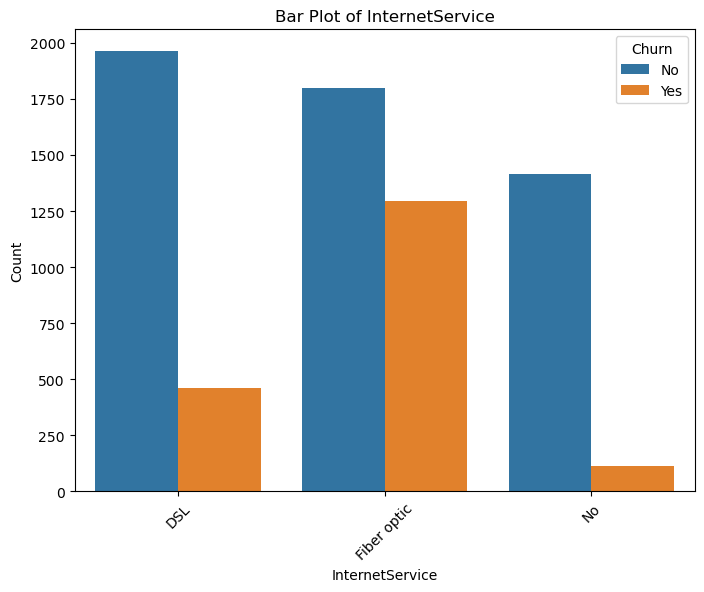

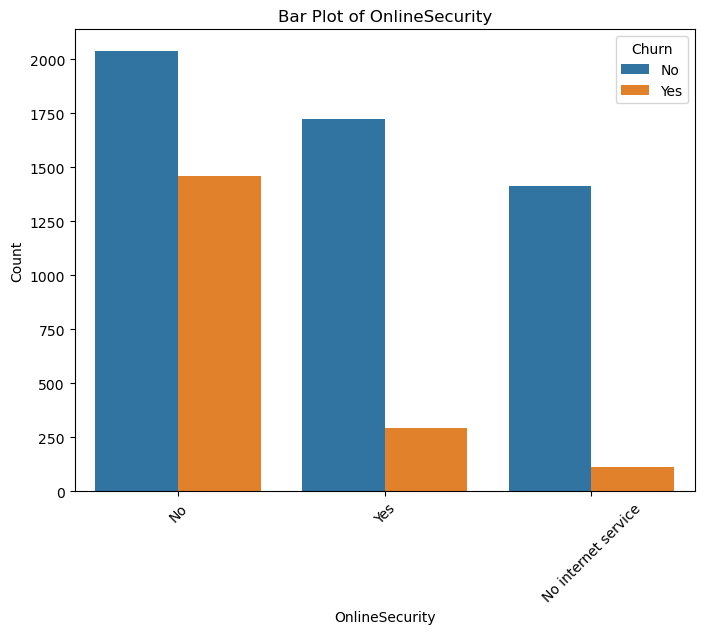

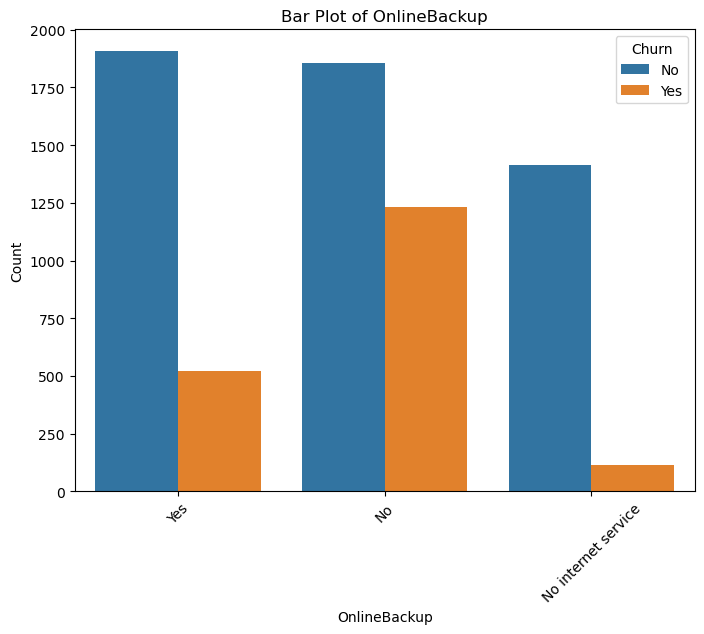

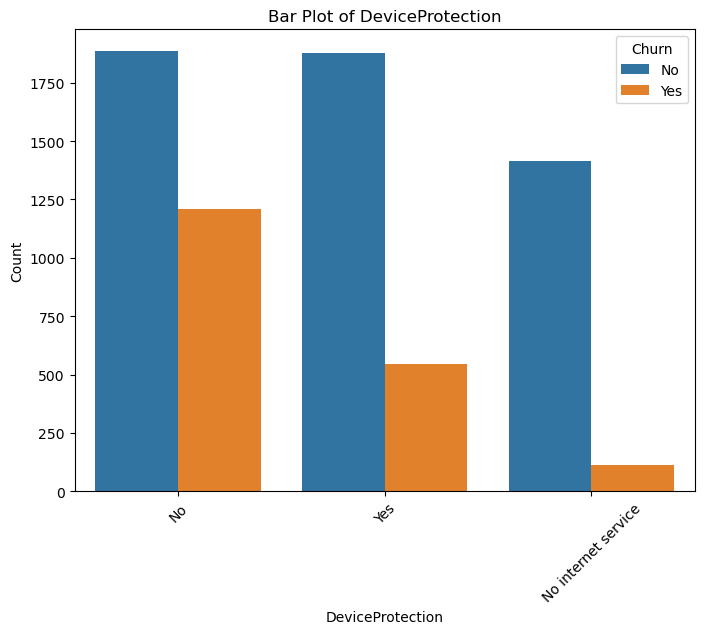

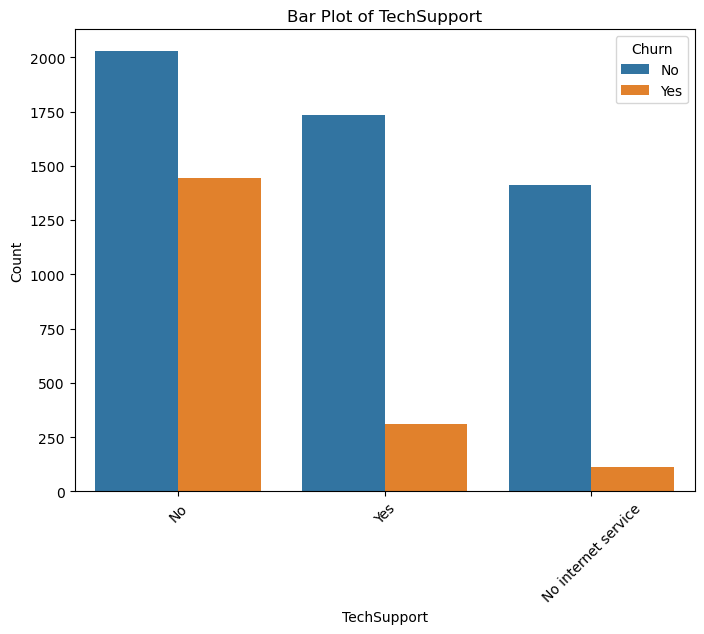

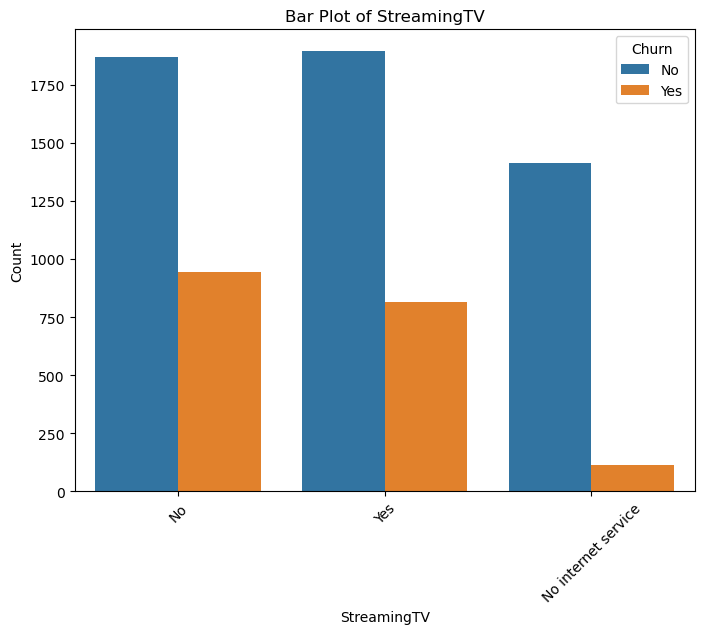

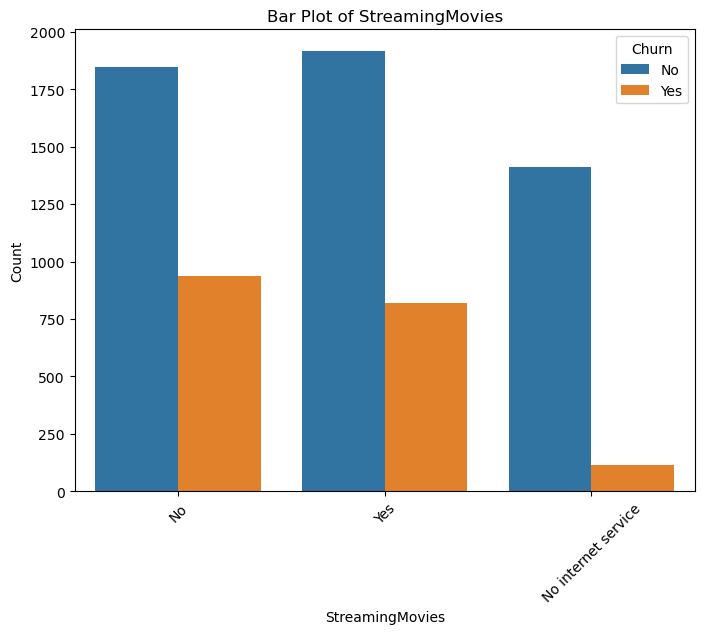

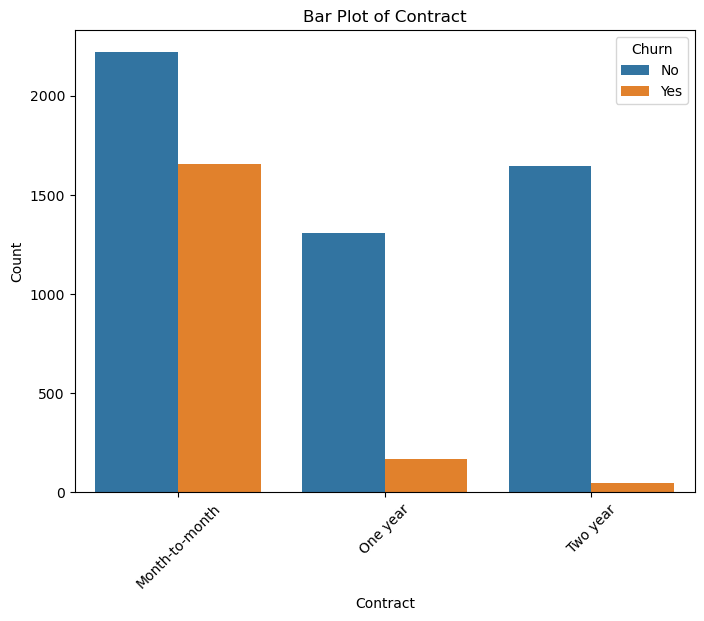

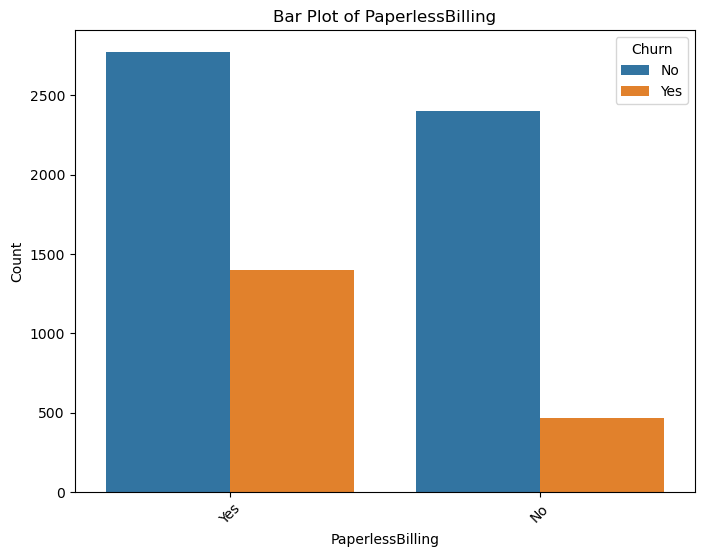

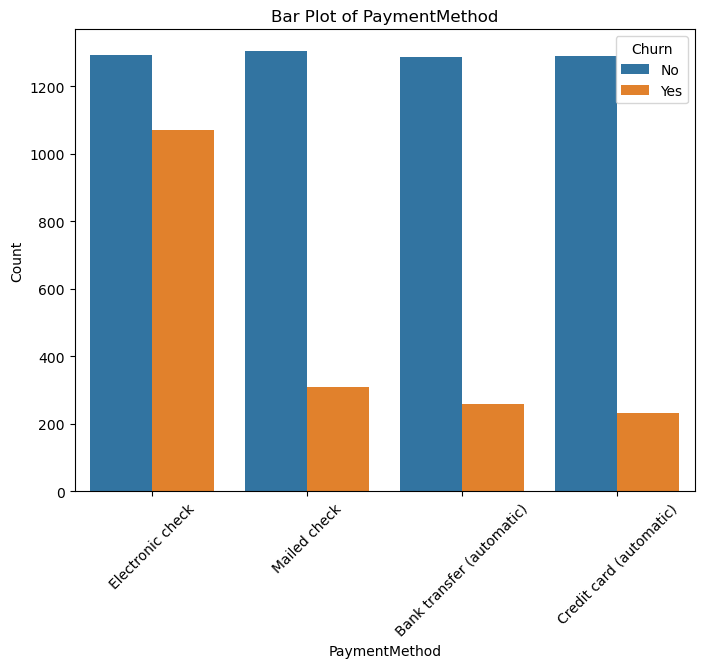

In [16]:
# Categorical features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plot bar plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=telco, x=col, hue='Churn')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Research Questions 

**Q1. Is there a correlation between contract length and customer churn?**

_From the graph **Bar Plot of Contract**, we can see that more customer that churn have the Month-to-Month subscription. We can therefore conclude that there is a negative correlation between the contact length and customer churn; i.e the shorter the contract length, the more likely that the customer will churn._

**Q2. Do customers who have online security and backup services have lower churn rates?**


_From the **Bar Plot of Online Security** and **Bar Plot of Online Backup** While it is evident that that there is lower churn rates for customers with online security and onlineBackup services, there was still more customers that did not have these services but still churned_

In [17]:
# Filter the dataset for customers with and without online security and backup services
with_services = telco[(telco['OnlineSecurity'] == 'Yes') & (telco['OnlineBackup'] == 'Yes')]
without_services = telco[(telco['OnlineSecurity'] == 'No') & (telco['OnlineBackup'] == 'No')]

# Calculate churn rates for customers with and without services
churn_rate_with_services = with_services['Churn'].value_counts(normalize=True)['Yes']
churn_rate_without_services = without_services['Churn'].value_counts(normalize=True)['Yes']
#The normalize=True parameter ensures that we get the churn rate as a proportion rather than a count.

print("Churn rate for customers with services:", churn_rate_with_services)
print("Churn rate for customers without services:", churn_rate_without_services)


Churn rate for customers with services: 0.10568383658969804
Churn rate for customers without services: 0.4815489749430524


_From the above, we can see that while there is **0.48** probability that a customer without both OnlineSecurity and OnlineBackup will churn, the probability of a customer with both services churning is just **0.1**._

**Q3. Does the payment method have an impact on customer churn?**

In [18]:
# Calculate churn counts for each payment method
payment_churn_counts = telco.groupby('PaymentMethod')['Churn'].value_counts().rename('Count')

# Calculate churn rates for each payment method
payment_churn_rates = telco.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).rename('Propotion')

# Concatenate the churn counts, rates, and proportions into one table
payment_churn_table = pd.concat([payment_churn_counts, payment_churn_rates], axis=1)

print(payment_churn_table)

                                 Count  Propotion
PaymentMethod             Churn                  
Bank transfer (automatic) No      1286   0.832902
                          Yes      258   0.167098
Credit card (automatic)   No      1290   0.847569
                          Yes      232   0.152431
Electronic check          No      1294   0.547146
                          Yes     1071   0.452854
Mailed check              No      1304   0.808933
                          Yes      308   0.191067


_Based on the findings above and from the graph **Bar plot of PaymentMethod**, we can observe that payment method does have an impact on customer attrition. However, we can conclude that customers using electronic check as their payment method have a significantly higher churn rate compared to other payment methods_.

_This insight can help inform strategies to reduce churn, such as promoting alternative payment methods or providing incentives for customers to switch from electronic check to more stable payment methods_


**Q4. Is there a difference in churn rates between male and female customers?**


In [19]:
gender_churn_rate = telco.groupby('gender')['Churn'].value_counts(normalize=True).rename('Count')
print(gender_churn_rate)

gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: Count, dtype: float64


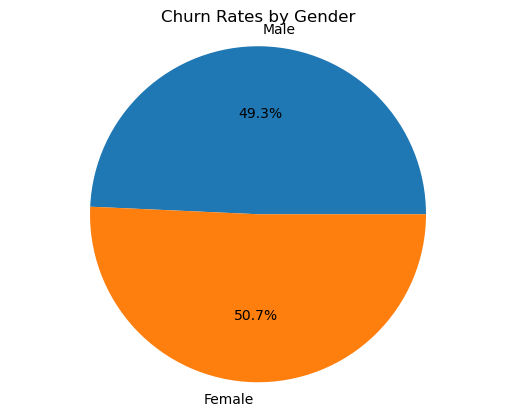

In [20]:
# Extract churn rates for male and female customers
male_churn_rate = gender_churn_rate['Male']['Yes']
female_churn_rate = gender_churn_rate['Female']['Yes']

# Create a pie chart to visualize churn rates for male and female customers
labels = ['Male', 'Female']
churn_rates = [male_churn_rate, female_churn_rate]

plt.pie(churn_rates, labels=labels, autopct='%1.1f%%')
plt.title('Churn Rates by Gender')
plt.axis('equal')
plt.show()


_From the above, it is observed that just about 26% of females and 27% of males droped from the Telco company services. The total number of people that churned comprise about 50% are each gender. The churn rate the gender is thus relatively equal._

**Q5. Are customers with dependents less likely to churn compared to those without dependents?**


Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
Name: Churn, dtype: float64


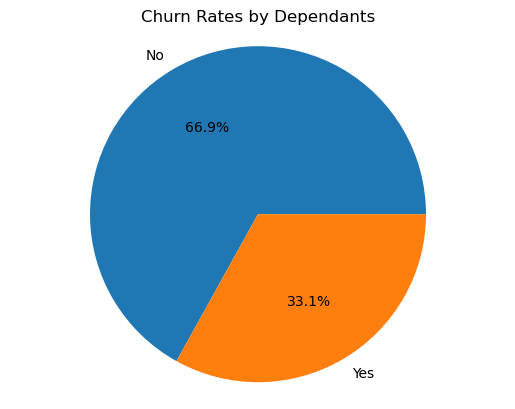

In [21]:
# Calculate churn rates for customers with and without dependents
dependent_churn_rates = telco.groupby('Dependents')['Churn'].value_counts(normalize=True)

print(dependent_churn_rates)
# Extract churn rates for churned customers with dependants
No_dependant_churn = dependent_churn_rates['No']['Yes']

# Extract churn rates for churned customers but without dependants
Yes_dependant_churn = dependent_churn_rates['Yes']['Yes']

# Create a pie chart to visualize churn rates for male and female customers
labels = ['No', 'Yes']
churn_rates = [No_dependant_churn, Yes_dependant_churn]

plt.pie(churn_rates, labels=labels, autopct='%1.1f%%')
plt.title('Churn Rates by Dependants')
plt.axis('equal')
plt.show()

_Of the total number of customers that churned, abt 66 percent had no dependants while about 33% had dependants.We can therefore coclude that customers with dependants are less likey to churn_.

**Q6. Is there a correlation between the Total Charge and customer churn?**


In [22]:
# Apply strip() method to remove leading/trailing whitespace
telco['TotalCharges'] = telco['TotalCharges'].str.strip()

# Replace empty strings with NaN values
telco['TotalCharges'].replace('', np.nan, inplace=True)

# Convert values to float, while ignoring non-numeric values
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

# Backfill missing values in the 'TotalCharges' column
telco['TotalCharges'].fillna(method='bfill', inplace=True)

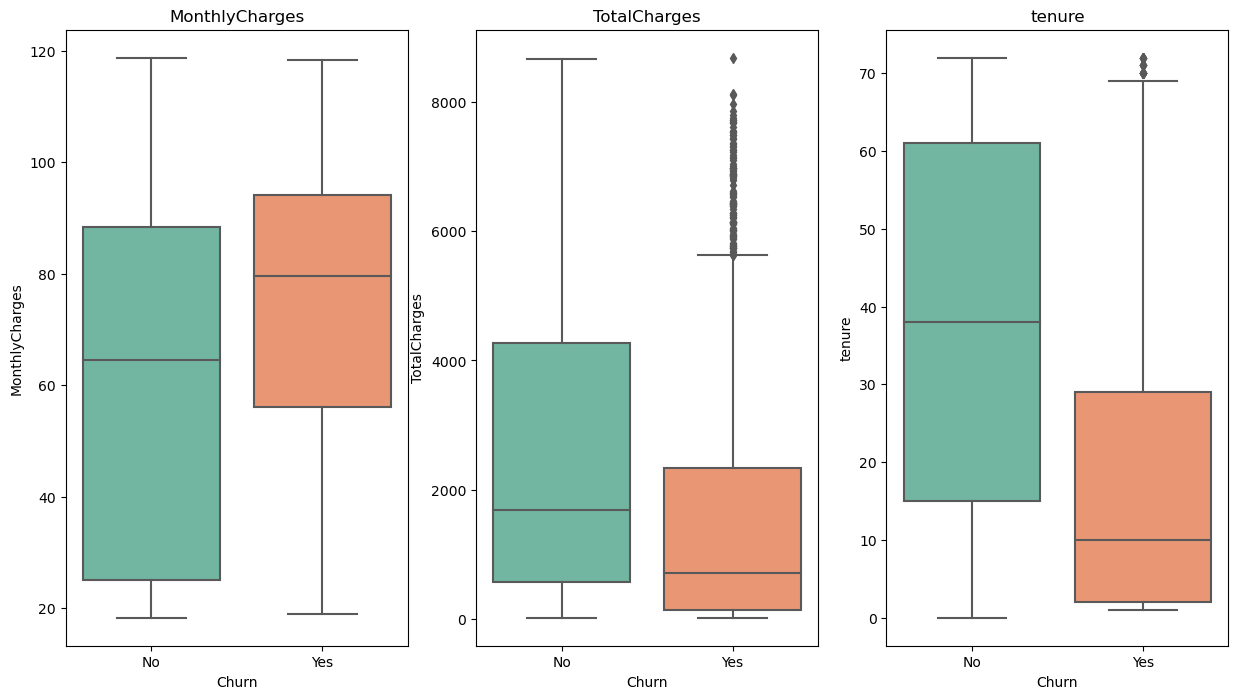

In [23]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]

#Box plot the numerical columns to show the churn trend
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
for i, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=telco["Churn"], y=telco[i], ax=subplot, palette = "Set2").set_title(str(i))



**Q6. Are the customers who get TechSupport service less likey to church?**


TechSupport          Churn
No                   No       0.583645
                     Yes      0.416355
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.848337
                     Yes      0.151663
Name: Churn, dtype: float64


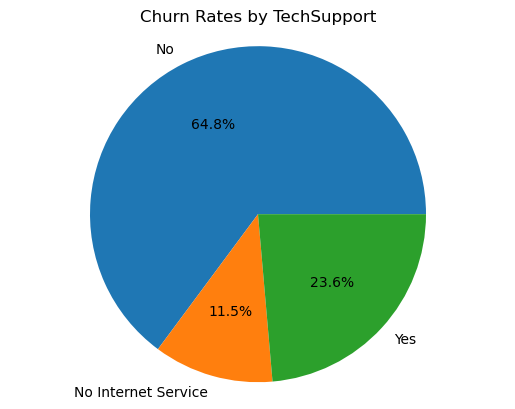

In [24]:
# Calculate the churn rates for customers with and without TechSupport service
techsupport_churn = telco.groupby('TechSupport')['Churn'].value_counts(normalize=True)
print(techsupport_churn)

#Extract the portion of customers who churned
labels = ['No','No Internet Service', 'Yes']
churn_rates = [techsupport_churn['No']['Yes'], techsupport_churn['No internet service']['Yes'],techsupport_churn['Yes']['Yes']]

plt.pie(churn_rates, labels=labels, autopct='%1.1f%%')
plt.title('Churn Rates by TechSupport')
plt.axis('equal')
plt.show()

_From the above, it is observed that the customers that did not have TechSuport had the highest attrition. It's therefore necessary to initiate measure of encouraging more customers to use TechSupport services in order to reduce the customers' turnover probability._

**Q7. Is there a relationship between the customers who get Device protections and churn?**

DeviceProtection     Churn
No                   No       0.608724
                     Yes      0.391276
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.774979
                     Yes      0.225021
Name: Customer_Proportion, dtype: float64


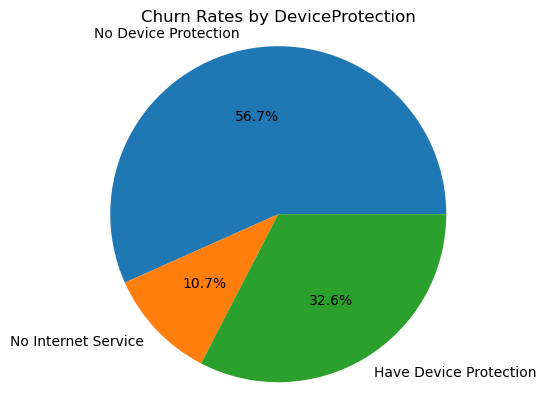

In [25]:
# Calculate the churn rates for customers with and without Device Protection service
device_protection_churn = telco.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).rename('Customer_Proportion')
print(device_protection_churn)


#Extract the churn rates for customers with protection, no protection and no internet
churn_rates = [device_protection_churn['No']['Yes'], device_protection_churn['No internet service']['Yes'],device_protection_churn['Yes']['Yes']]
labels = ['No Device Protection','No Internet Service', 'Have Device Protection']

#Plot the customers that churned in a pie chart
plt.pie(churn_rates, labels=labels, autopct='%1.1f%%')
plt.title('Churn Rates by DeviceProtection')
plt.axis('equal')
plt.show()

_From the observation, it is indicated that a large proportion of customers who churner did not have device protection. 
It is therefore necessary for the team to formulate incentive strategise to encourage customers to use the device protection service_. 

## Feature Processing & Engineering 

In [26]:
#Check if there are any space strings
space_strings = telco[telco == ' '].count()
print(space_strings)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


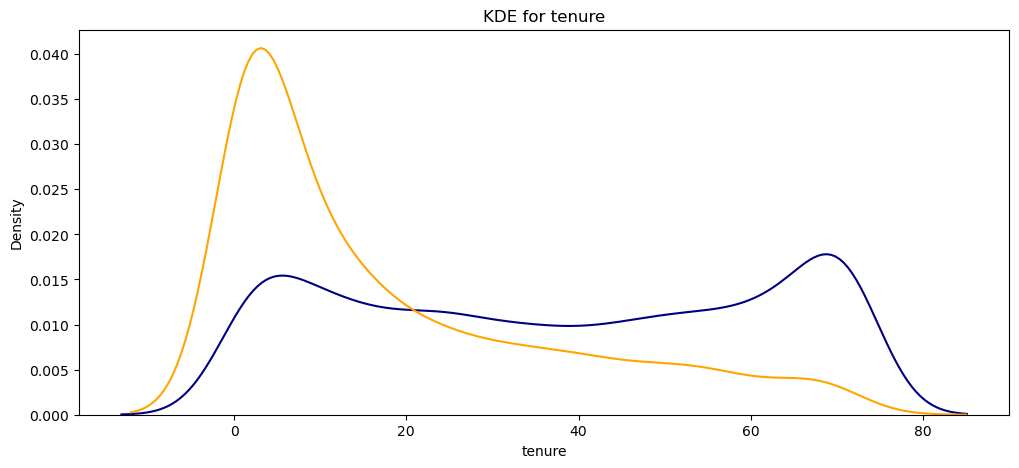

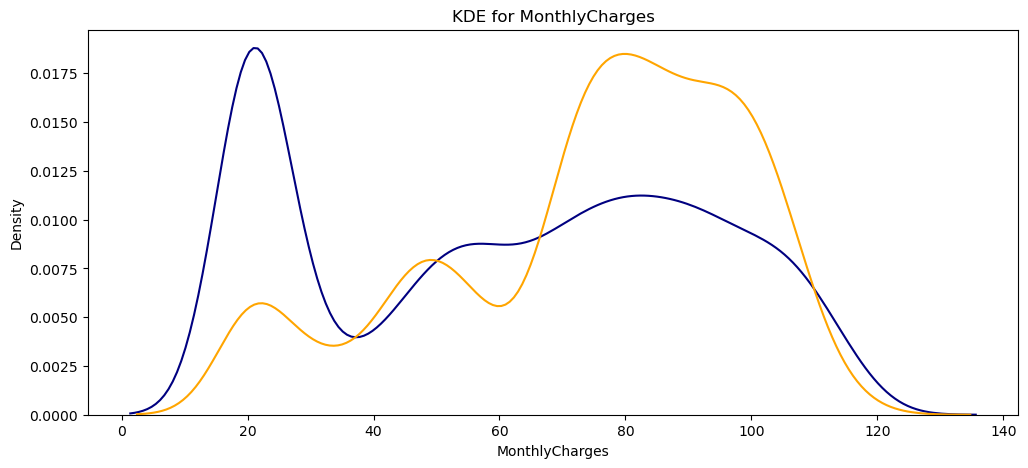

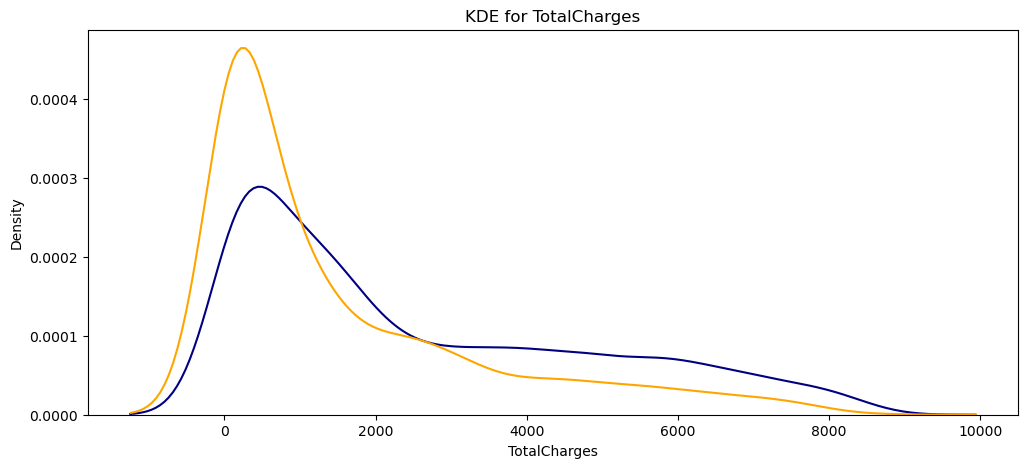

In [27]:
#Check n the distribution of the numerical values 
def kdeplot(feature):
    plt.figure(figsize=(12,5))
    plt.title("KDE for {}".format(feature))
    ax0=sns.kdeplot(telco[telco['Churn']=='No'][feature],color='navy',label='Churn: No')
    ax1=sns.kdeplot(telco[telco['Churn']=='Yes'][feature],color='orange',label='Churn: Yes')
    
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')


**From the plots of numerical feature**
- Clients with low tenure are more likey to churn
- Clients sith higher monthly charge are more likey to churn
- Churn trend from the TotalCharges data is not significant. **Tenure and MonthlyCharges** are more important features

No     5174
Yes    1869
Name: Churn, dtype: int64


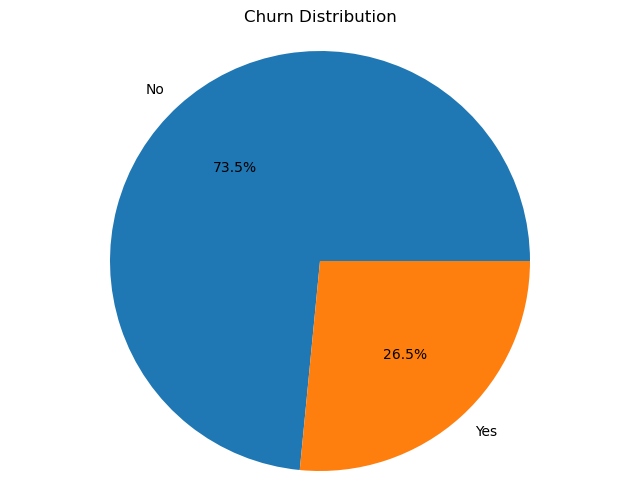

In [28]:
#Checkk the target dataset i.e churn
print(telco['Churn'].value_counts())

#plot in a pie chart
ax=(telco['Churn'].value_counts(normalize=True))
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(ax, labels=ax.index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

_**From the above we notice our data is imbalanced. We may need to scale it to have balanced data for our ML models**_

## Balance The data

In [29]:
#First split the data
# balance and Scale the train set only 
#train on unbalanced set, then balance set
#Compare the two results 

In [30]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler


# Separate the features (X) and the target variable (y)
X = telco.drop('Churn', axis=1)
y = telco['Churn']

# Create an instance of the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
balanced_telco = pd.DataFrame(X_resampled, columns=X.columns)
balanced_telco['Churn'] = y_resampled

# Print the class distribution after balancing
print(balanced_telco['Churn'].value_counts())


No     5174
Yes    5174
Name: Churn, dtype: int64


## Data Splitting 

In [31]:
#Drop the CustomerID column
telco.drop(['customerID'], axis=1, inplace=True)

# Split the data into features (X) and target variable (y)
X = telco.drop('Churn', axis=1)  # Exclude the 'Churn' column
y = telco['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the split datasets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (4930, 19) y: (4930,)
Testing set - X: (2113, 19) y: (2113,)


In [32]:
#Resample X_train and y_train


### Categorical feature encoding 

In [33]:
from sklearn.preprocessing import OrdinalEncoder
# Identify categorical columns for ordinal encoding
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform ordinal encoding on training set
ordinal_encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_train_encoded[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])

# Perform ordinal encoding on test set
X_test_encoded = X_test.copy()
X_test_encoded[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])


## Feature Scaling 

In [34]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Perform Standard Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Perform Min-Max Scaling
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Convert the scaled data back to DataFrames
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# # Print the scaled training set
# print("Scaled Training Set:")
# print(X_train_scaled.head())

# # Print the scaled test set
# print("Scaled Test Set:")
# print(X_test_scaled.head())


In [35]:
# # Identify categorical columns for ordinal encoding
# categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
#                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
#                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# # Perform ordinal encoding on training and test sets
# ordinal_encoder = OrdinalEncoder()
# X_train_encoded = X_train.copy()
# X_test_encoded = X_test.copy()
# X_train_encoded[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
# X_test_encoded[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()
numeric_cols = X_train_encoded.select_dtypes(include='number').columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])

# Print the scaled training set
print("Scaled Training Set:")
print(X_train_scaled.head())

# Print the scaled test set
print("Scaled Test Set:")
print(X_test_scaled.head())


Scaled Training Set:
        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
1695  0.968056      -0.436831  1.030066    1.518718  0.881078      0.323478   
1095  0.968056      -0.436831 -0.970811   -0.658450 -1.284263      0.323478   
3889  0.968056      -0.436831 -0.970811   -0.658450 -0.793997      0.323478   
3667 -1.032999       2.289215  1.030066    1.518718 -0.344587      0.323478   
2902 -1.032999       2.289215 -0.970811   -0.658450 -1.079985      0.323478   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1695       1.101601        -1.183518       -0.921835      1.235074   
1095      -1.002988         0.169309       -0.921835     -1.038182   
3889      -1.002988         1.522136        0.241967      0.098446   
3667      -1.002988         0.169309       -0.921835     -1.038182   
2902      -1.002988         0.169309        1.405769     -1.038182   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1695

In [36]:
#Initialize and Empty Dictionary to store the results 
results =[]

## Logistic Regression 

In [37]:
# # Select the relevant features and target variable
# X = telco[['MonthlyCharges', 'TotalCharges', 'tenure']]
# y = telco['Churn']
reports = {}
# Initialize the logistic regression model
logreg = LogisticRegression()

# # Fit the model on the training data
# logreg.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = logreg.predict(X_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

# Fit the logistic regression model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = logreg.predict(X_test_scaled)
results.append(logreg)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 81.07%
Confusion Matrix:
 [[1386  153]
 [ 247  327]]
Confusion Matrix:
 [[1386  153]
 [ 247  327]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      1539
         Yes       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



-Accuracy of 0.76 indicates that the model is able to predict correctly around 76% of the time.

-From the confusion matrix, it can be seen that the model is better at predicting non-churners than churners.

-Precision for non-churners is 0.84 and for churners is 0.56, which indicates that when the model predicts a non-churner, it is correct around 84% of the time and when it predicts a churner, it is correct around 56% of the time.

-Recall for non-churners is 0.83 and for churners is 0.57, which indicates that the model is able to identify around 83% of the non-churners and only around 57% of the churners.

-F1-score for non-churners is 0.84 and for churners is 0.57, which is the harmonic mean of precision and recall and indicates the balance between the two.

_**Based on the classification report, the model has higher precision, recall, and F1-score for the "No" class compared to the "Yes" class. This indicates that the model performs better in predicting customers who are not likely to churn.
In summary, the model shows reasonably good accuracy but may have some difficulty predicting the churned class accurately.**_

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = decision_tree.predict(X_test_scaled)
results.append(decision_tree)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Get the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.7278750591575959
Confusion Matrix:
 [[1262  277]
 [ 298  276]]
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.82      0.81      1539
         Yes       0.50      0.48      0.49       574

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.73      0.73      2113



- The accuracy of the model is 0.72, which means it correctly predicts the churn status of approximately 72% of the customers in the test set.

- The macro average of precision, recall, and F1-score is 0.64, which is the average performance across both classes. The weighted average takes into account class imbalance and is also provided.

_**Based on the classification report, the decision tree model performs better in predicting the not churned class (No) compared to the churned class (Yes)**_.

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)
results.append(rf_classifier)
# Evaluate the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.79649787032655
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



- F1-score is 0.84, indicating a balance between precision and recall. For the "Yes" class, the F1-score is 0.50, indicating a trade-off between precision and recall.

- The macro average and weighted average values provide an overall summary of the performance across both classes.

**_Based on these results, it appears that the Random Forest classifier has relatively better performance in predicting non-churn customers (higher precision, recall, and F1-score) compared to churn customers_**.

## CatBoost Classifier

In [40]:
telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Categorical columns Ecoding 

In [41]:
# from catboost import CatBoostClassifier


# # Select the categorical features to encode
# categorical_features = ['Contract', 'PaymentMethod']

# # Apply one-hot encoding to categorical features
# onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# encoded_features = onehot_encoder.fit_transform(telco[categorical_features])

# # Get the feature names after one-hot encoding
# feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# # Create a new dataframe with the encoded features
# encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# # Concatenate the encoded features with the original dataframe
# telco_encoded = pd.concat([telco.drop(categorical_features, axis=1), encoded_df], axis=1)

# # Split the data into features (X) and target variable (y)
# X = telco_encoded.drop('Churn', axis=1)
# y = telco_encoded['Churn']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the CatBoostClassifier
# catboost = CatBoostClassifier()
# catboost.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = catboost.predict(X_test)

# # Calculate accuracy and print classification report
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [42]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier
catboost = CatBoostClassifier()

# Fit the CatBoost model on the scaled training data
catboost.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = catboost.predict(X_test_scaled)
results.append(catboost)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Learning rate set to 0.02036
0:	learn: 0.6785214	total: 151ms	remaining: 2m 31s
1:	learn: 0.6676308	total: 154ms	remaining: 1m 16s
2:	learn: 0.6554739	total: 157ms	remaining: 52.3s
3:	learn: 0.6437027	total: 162ms	remaining: 40.3s
4:	learn: 0.6324660	total: 166ms	remaining: 33.1s
5:	learn: 0.6221061	total: 170ms	remaining: 28.1s
6:	learn: 0.6119505	total: 174ms	remaining: 24.7s
7:	learn: 0.6030357	total: 177ms	remaining: 22s
8:	learn: 0.5935164	total: 182ms	remaining: 20s
9:	learn: 0.5849345	total: 186ms	remaining: 18.5s
10:	learn: 0.5767223	total: 190ms	remaining: 17.1s
11:	learn: 0.5691108	total: 194ms	remaining: 16s
12:	learn: 0.5630240	total: 197ms	remaining: 15s
13:	learn: 0.5565835	total: 200ms	remaining: 14.1s
14:	learn: 0.5505412	total: 205ms	remaining: 13.5s
15:	learn: 0.5450175	total: 210ms	remaining: 12.9s
16:	learn: 0.5394914	total: 214ms	remaining: 12.4s
17:	learn: 0.5339872	total: 218ms	remaining: 11.9s
18:	learn: 0.5287043	total: 222ms	remaining: 11.5s
19:	learn: 0.52338

161:	learn: 0.3893102	total: 970ms	remaining: 5.02s
162:	learn: 0.3892040	total: 978ms	remaining: 5.02s
163:	learn: 0.3890499	total: 987ms	remaining: 5.03s
164:	learn: 0.3889206	total: 995ms	remaining: 5.03s
165:	learn: 0.3886548	total: 1s	remaining: 5.05s
166:	learn: 0.3884946	total: 1.01s	remaining: 5.06s
167:	learn: 0.3882647	total: 1.02s	remaining: 5.06s
168:	learn: 0.3880536	total: 1.03s	remaining: 5.07s
169:	learn: 0.3878200	total: 1.04s	remaining: 5.1s
170:	learn: 0.3876166	total: 1.05s	remaining: 5.1s
171:	learn: 0.3874036	total: 1.06s	remaining: 5.1s
172:	learn: 0.3872766	total: 1.06s	remaining: 5.09s
173:	learn: 0.3870727	total: 1.07s	remaining: 5.09s
174:	learn: 0.3869123	total: 1.08s	remaining: 5.09s
175:	learn: 0.3867609	total: 1.09s	remaining: 5.09s
176:	learn: 0.3863718	total: 1.09s	remaining: 5.08s
177:	learn: 0.3861299	total: 1.1s	remaining: 5.08s
178:	learn: 0.3859666	total: 1.1s	remaining: 5.07s
179:	learn: 0.3857447	total: 1.11s	remaining: 5.07s
180:	learn: 0.385565

333:	learn: 0.3632867	total: 2.11s	remaining: 4.21s
334:	learn: 0.3631510	total: 2.12s	remaining: 4.2s
335:	learn: 0.3629747	total: 2.12s	remaining: 4.2s
336:	learn: 0.3628575	total: 2.13s	remaining: 4.19s
337:	learn: 0.3626989	total: 2.13s	remaining: 4.18s
338:	learn: 0.3625933	total: 2.14s	remaining: 4.17s
339:	learn: 0.3624992	total: 2.15s	remaining: 4.16s
340:	learn: 0.3623605	total: 2.15s	remaining: 4.15s
341:	learn: 0.3622263	total: 2.15s	remaining: 4.14s
342:	learn: 0.3621013	total: 2.16s	remaining: 4.14s
343:	learn: 0.3619630	total: 2.17s	remaining: 4.13s
344:	learn: 0.3617612	total: 2.17s	remaining: 4.12s
345:	learn: 0.3617605	total: 2.17s	remaining: 4.11s
346:	learn: 0.3616746	total: 2.18s	remaining: 4.1s
347:	learn: 0.3615987	total: 2.18s	remaining: 4.09s
348:	learn: 0.3615230	total: 2.19s	remaining: 4.08s
349:	learn: 0.3613709	total: 2.19s	remaining: 4.07s
350:	learn: 0.3611746	total: 2.2s	remaining: 4.06s
351:	learn: 0.3609413	total: 2.2s	remaining: 4.05s
352:	learn: 0.360

531:	learn: 0.3393366	total: 3.28s	remaining: 2.89s
532:	learn: 0.3392177	total: 3.29s	remaining: 2.88s
533:	learn: 0.3390962	total: 3.29s	remaining: 2.87s
534:	learn: 0.3390365	total: 3.29s	remaining: 2.86s
535:	learn: 0.3389294	total: 3.3s	remaining: 2.86s
536:	learn: 0.3388502	total: 3.3s	remaining: 2.85s
537:	learn: 0.3386519	total: 3.31s	remaining: 2.84s
538:	learn: 0.3385133	total: 3.31s	remaining: 2.83s
539:	learn: 0.3383377	total: 3.32s	remaining: 2.82s
540:	learn: 0.3382570	total: 3.32s	remaining: 2.82s
541:	learn: 0.3381798	total: 3.32s	remaining: 2.81s
542:	learn: 0.3380397	total: 3.33s	remaining: 2.8s
543:	learn: 0.3379250	total: 3.33s	remaining: 2.79s
544:	learn: 0.3377976	total: 3.34s	remaining: 2.79s
545:	learn: 0.3377117	total: 3.34s	remaining: 2.78s
546:	learn: 0.3376562	total: 3.35s	remaining: 2.77s
547:	learn: 0.3375760	total: 3.35s	remaining: 2.76s
548:	learn: 0.3374776	total: 3.35s	remaining: 2.75s
549:	learn: 0.3373801	total: 3.36s	remaining: 2.75s
550:	learn: 0.3

721:	learn: 0.3178065	total: 4.08s	remaining: 1.57s
722:	learn: 0.3176643	total: 4.09s	remaining: 1.57s
723:	learn: 0.3175835	total: 4.09s	remaining: 1.56s
724:	learn: 0.3174706	total: 4.1s	remaining: 1.55s
725:	learn: 0.3173906	total: 4.1s	remaining: 1.55s
726:	learn: 0.3172677	total: 4.11s	remaining: 1.54s
727:	learn: 0.3171729	total: 4.11s	remaining: 1.53s
728:	learn: 0.3170828	total: 4.11s	remaining: 1.53s
729:	learn: 0.3168989	total: 4.12s	remaining: 1.52s
730:	learn: 0.3167855	total: 4.12s	remaining: 1.52s
731:	learn: 0.3167253	total: 4.13s	remaining: 1.51s
732:	learn: 0.3166641	total: 4.13s	remaining: 1.5s
733:	learn: 0.3165714	total: 4.13s	remaining: 1.5s
734:	learn: 0.3164203	total: 4.14s	remaining: 1.49s
735:	learn: 0.3162996	total: 4.14s	remaining: 1.49s
736:	learn: 0.3162345	total: 4.14s	remaining: 1.48s
737:	learn: 0.3161791	total: 4.15s	remaining: 1.47s
738:	learn: 0.3160488	total: 4.15s	remaining: 1.47s
739:	learn: 0.3159509	total: 4.16s	remaining: 1.46s
740:	learn: 0.31

906:	learn: 0.3005811	total: 4.88s	remaining: 500ms
907:	learn: 0.3005119	total: 4.88s	remaining: 495ms
908:	learn: 0.3004429	total: 4.89s	remaining: 489ms
909:	learn: 0.3003275	total: 4.89s	remaining: 484ms
910:	learn: 0.3002422	total: 4.9s	remaining: 478ms
911:	learn: 0.3001612	total: 4.9s	remaining: 473ms
912:	learn: 0.3000913	total: 4.91s	remaining: 467ms
913:	learn: 0.2999955	total: 4.91s	remaining: 462ms
914:	learn: 0.2998871	total: 4.91s	remaining: 456ms
915:	learn: 0.2998107	total: 4.92s	remaining: 451ms
916:	learn: 0.2997196	total: 4.92s	remaining: 446ms
917:	learn: 0.2996611	total: 4.93s	remaining: 440ms
918:	learn: 0.2996107	total: 4.93s	remaining: 435ms
919:	learn: 0.2995655	total: 4.93s	remaining: 429ms
920:	learn: 0.2994945	total: 4.94s	remaining: 424ms
921:	learn: 0.2994092	total: 4.94s	remaining: 418ms
922:	learn: 0.2992613	total: 4.95s	remaining: 413ms
923:	learn: 0.2991576	total: 4.95s	remaining: 407ms
924:	learn: 0.2991024	total: 4.96s	remaining: 402ms
925:	learn: 0.

## Gradient Boosting Classifier 

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()

# Fit the gradient boosting model on the scaled training data
gradient_boost.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = gradient_boost.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
results.append(gradient_boost)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Accuracy: 0.8035967818267865
Confusion Matrix:
 [[1396  143]
 [ 272  302]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



## Support Vector Machine 

In [44]:
from sklearn.svm import SVC

# Create an instance of SVC
svm = SVC()

# Fit the SVM model on the scaled training data
svm.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = svm.predict(X_test_scaled)
results.append(svm)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Accuracy: 0.8017037387600567
Confusion Matrix:
 [[1415  124]
 [ 295  279]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



## Naive Bayes

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Create an instance of GaussianNB
naive_bayes = GaussianNB()

# Fit the Naive Bayes model on the scaled training data
naive_bayes.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = naive_bayes.predict(X_test_scaled)
results.append(naive_bayes)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Accuracy: 0.7562707051585423
Confusion Matrix:
 [[1159  380]
 [ 135  439]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



## K-Nearest Neighbours (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = knn.predict(X_test_scaled)
results.append(knn)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Accuracy: 0.7524846190250828
Confusion Matrix:
 [[1303  236]
 [ 287  287]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



## Multi-Layer Perceptron

In [47]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Fit the MLP model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = mlp.predict(X_test_scaled)
results.append(mlp)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)
Multi_Layer = classification_report


Accuracy: 0.759110269758637
Confusion Matrix:
 [[1335  204]
 [ 305  269]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



C:\Users\lakit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### sgd

In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris


# Create and train the SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


### AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier


# Create and train the AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report)


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [52]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
# print(reports)

### Hyperparameter tuning of SGD

In [63]:
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and SGDClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__loss': ['hinge', 'log', 'modified_huber'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling'],
    'classifier__max_iter': [1000, 2000],
    'classifier__penalty': ['l2', 'l1'],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:\n', classification_report)

C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\sit

C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\lakit\anaconda3\lib\sit

Best Hyperparameters: {'classifier__alpha': 0.0001, 'classifier__learning_rate': 'optimal', 'classifier__loss': 'log', 'classifier__max_iter': 1000, 'classifier__penalty': 'l1'}
Best Score: 0.9583333333333334
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



C:\Users\lakit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lakit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lakit\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\lakit\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "

### Hyper parameter tuning of AdaBoost

In [64]:

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best Score: 0.9416666666666668
Accuracy: 1.0
